In [1]:
%load_ext autoreload
%autoreload 2

# Compare measurements of Si IBC cell STREET22_32-14

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pvcircuit as pvc
import ipywidgets as widgets
#%matplotlib inline
#import ipympl
%matplotlib widget
%gui asyncio

In [3]:
# data Si IBC 1J, 2T
path = pvc.datapath
NREL = 'NREL_32-14.csv'
ISFH = 'ISFH_32-14.csv'
dfNREL = pd.read_csv(path+NREL, index_col=0)
dfISFH = pd.read_csv(path+ISFH, index_col=0)
#parse
NREL_darkV=np.array(dfNREL.index)
NREL_darkI=np.array(dfNREL['darkJ'])*4/1000.  #->A
NREL_lightV=np.array(dfNREL['lightV'])
NREL_lightI=np.array(dfNREL['lightJ'])*4/1000.  #->A

ISFH_darkV=np.array(dfISFH.index)
ISFH_darkI=np.array(dfISFH['darkI'])
ISFH_lightV=np.array(dfISFH['lightV'])
ISFH_lightI=np.array(dfISFH['lightI'])

In [4]:
# model starting with ISFH fit
Algt = 3.97
Adrk = 9.
SiIBC = pvc.Multi2T(name='SiIBC',Eg_list=[1.1],Rs2T=0,Jext=.03986,n=[1., 5.439])
SiIBC.set(Gsh=(1./514.4*Algt/Adrk),lightarea=Algt, totalarea=Adrk)
SiIBC.j[0]._J0init([(150.5e-15/Adrk), (2491.0e-9/Adrk)])
SiIBC.j[0].set(RBB='JFG', J0rb=1e-4)
SiIBC

SiIBC: <tandem.Multi2T class>
T = 25.0 C, Rs2T= 0 Ω cm2

j[0]: <tandem.Junction class>
Eg = 1.10 eV, TC = 25.0 C
Jext = 39.9 , JLC = 0.0 mA/cm2
Gsh = 0.000857525 S/cm2, Rser = 0 Ωcm2
lightA = 3.97 cm2, totalA = 9 cm2
pn = -1, beta = 0, gamma = 0
   n    J0ratio   J0(A/cm2) 
  db       1      1.314e-16 
 1.00    127.25   1.672e-14 
 5.44     0.06    2.768e-07  
RBB_dict: {'method': 'JFG', 'mrb': 10.0, 'J0rb': 0.0001, 'Vrb': 0.0}

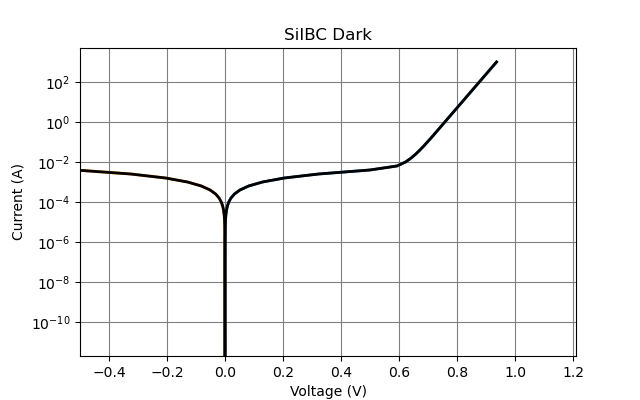

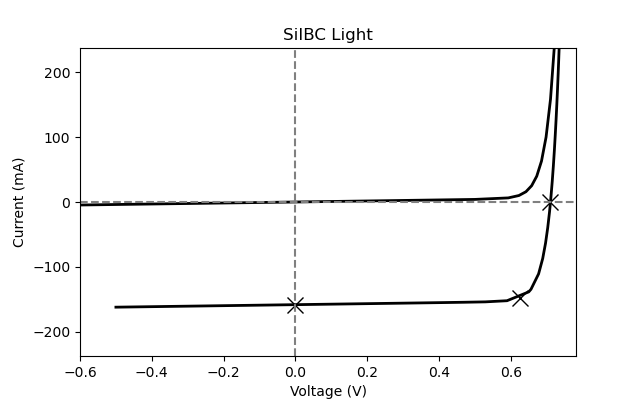

In [5]:
ui, dax, lax = SiIBC.controls()
ui

In [6]:
# add data to interactive plots
dax.plot(NREL_darkV, NREL_darkI, c='blue', lw=0, marker='.', label='pNREL', zorder=0)
dax.plot(NREL_darkV, -NREL_darkI, c='blue', lw=0, marker='.', label='nNREL', zorder=0)
lax.plot(NREL_darkV, NREL_darkI*1000, c='blue', lw=0, marker='.', label='dNREL', zorder=0)
lax.plot(NREL_lightV, NREL_lightI*1000, c='blue', lw=0, marker='.', label='lNREL', zorder=0)

dax.plot(ISFH_darkV, ISFH_darkI, c='red', lw=0, marker='.', label='pISFH', zorder=0)
dax.plot(ISFH_darkV, -ISFH_darkI, c='red', lw=0, marker='.', label='nISFH', zorder=0)
lax.plot(ISFH_darkV, ISFH_darkI*1000, c='red', lw=0, marker='.', label='dISFH', zorder=0)
lax.plot(ISFH_lightV, ISFH_lightI*1000, c='red', lw=0, marker='.', label='lISFH', zorder=0)

# legend
lines = dax.get_lines()
hands=[]
labs = []
for line in lines:
    linelabel=line.get_label()
    if linelabel =='pdark':
        hands.append(line)
        labs.append('fit')
    elif linelabel =='pNREL':
        hands.append(line)
        labs.append('NREL')
    elif linelabel =='pISFH':
        hands.append(line)
        labs.append('ISFH')

dax.legend(hands, labs)

In [7]:
# change model parameters on command line and update within the widget controls
SiIBC.set(n = [1., 2.], J0ratio = [100., 10.], Rs2T = 0.5)  # better ISFH fit
SiIBC.update()

In [8]:
#SiIBC.set(n = [1., 2.], J0ratio = [200., 15.], Gsh=0.00065, Rs2T = 8.3)  # NREL fit 
#SiIBC.update()

In [9]:
#SiIBC.j[0].set(RBB='JFG', J0rb=1e-4)
#SiIBC.update()

In [10]:
SiIBC

SiIBC: <tandem.Multi2T class>
T = 25.0 C, Rs2T= 0.5 Ω cm2

j[0]: <tandem.Junction class>
Eg = 1.10 eV, TC = 25.0 C
Jext = 39.9 , JLC = 0.0 mA/cm2
Gsh = 0.000857525 S/cm2, Rser = 0 Ωcm2
lightA = 3.97 cm2, totalA = 9 cm2
pn = -1, beta = 0, gamma = 0
   n    J0ratio   J0(A/cm2) 
  db       1      1.314e-16 
 1.00    100.00   1.314e-14 
 2.00    10.00    3.625e-09  
RBB_dict: {'method': 'JFG', 'mrb': 10.0, 'J0rb': 0.0001, 'Vrb': 0.0}